In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("bbc_news_dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None


In [4]:
X = df['Text']
y = df['Category']

In [5]:
category_names = df['Category'].unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [7]:
value_counts = df ['Category'].value_counts()
print(value_counts)

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


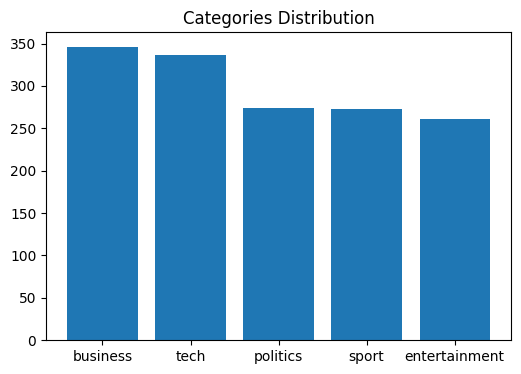

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(x=category_names, height=value_counts)
plt.title("Categories Distribution");

In [9]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.0 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.1 MB 1.0 MB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.1 MB 868.0 kB/s eta 0:00:08
   ---------- ----------------------------- 2.1/8.1 MB 947.3 kB/s eta 0:00:07
   ---------- --------------------

In [12]:
!pip install wordcloud

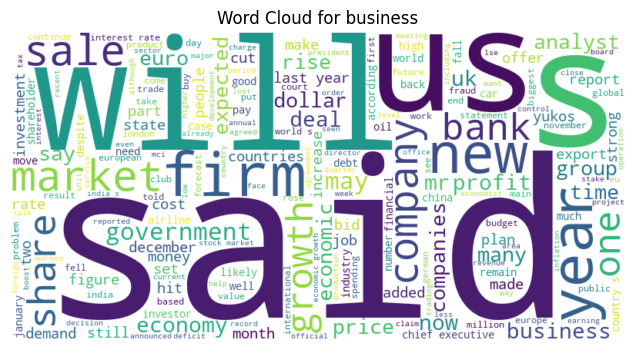

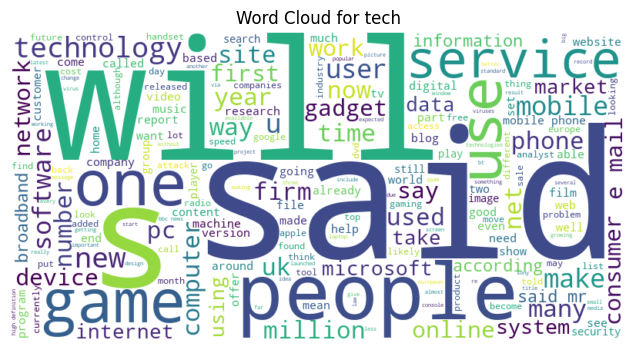

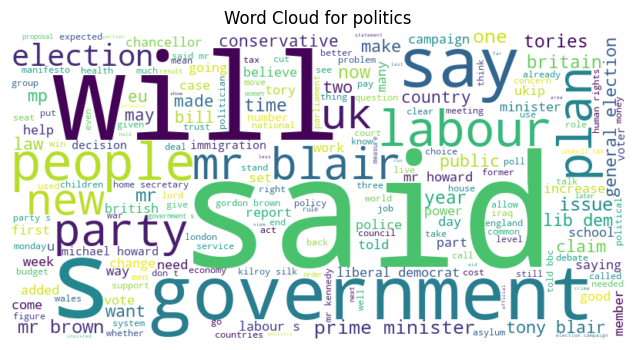

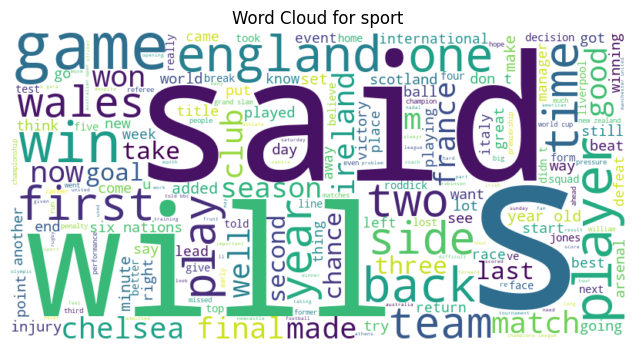

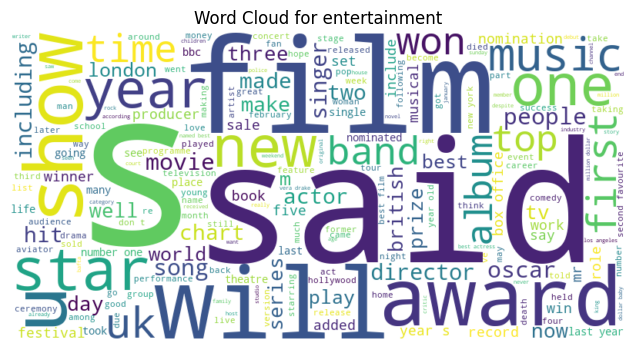

In [15]:
from wordcloud import WordCloud
for category in category_names:
    text = " ".join(df[df['Category'] == category]['Text'].values)
    wordcloud = WordCloud(
        width = 800, height = 400, background_color = 'white'
    ).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.savefig(f'Word Cloud for {category}.png')
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42
)
print(f'Shape of X_train = {X_train.shape} and y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape} and y_test = {y_test.shape}')


Shape of X_train = (1192,) and y_train = (1192,)
Shape of X_test = (298,) and y_test = (298,)


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(X_train,y_train)
y_preds = nb_model.predict(X_test)
print(f'Accuracy - {accuracy_score(y_test,y_preds)*100:.3f}')
print(f'Classification Report \n {classification_report(y_test,y_preds)}')

Accuracy - 95.638
Classification Report 
                precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



<function matplotlib.pyplot.show(close=None, block=None)>

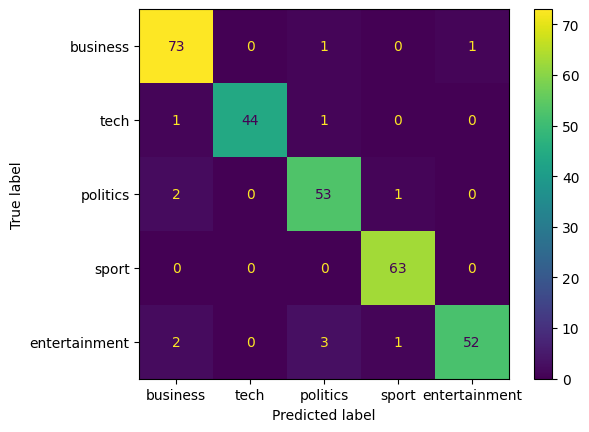

In [19]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Category'].unique())
cm_plot.plot()
plt.savefig("cm.png")
plt.show

In [21]:
user_text ="Chelsea won the champions league against bayern muinch "
prediction = nb_model.predict([user_text])
print (prediction)

['sport']


In [24]:
prediction[0]


np.str_('sport')

In [ ]:
import joblib

joblib.dump(nb_model, "new_category_prediction.joblib")


['new_category_prediction.joblib']